Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [221]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [222]:
pd.read_csv?

In [223]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [224]:
# number of Rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [225]:
diabetes_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [226]:
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [227]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [228]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [229]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [230]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [231]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [232]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [233]:
scaler = StandardScaler()

In [234]:
standardized_data = scaler.fit_transform(X)

In [235]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [236]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [237]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [239]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [240]:
columns_x = diabetes_dataset.iloc[1:1,0:8].columns;
X_train_df = pd.DataFrame(X_train, columns=columns_x)
X_test_df = pd.DataFrame(X_test, columns=columns_x)
print(X_train_df)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      -1.141852 -0.059293      -3.572597      -1.288212 -0.692891  0.051710   
1       0.639947 -0.497453       0.046245       0.719086 -0.102454 -0.151361   
2      -0.844885  2.131507      -0.470732       0.154533  6.652839 -0.240205   
3      -0.547919 -0.497453       0.563223       1.534551  0.965543  0.216705   
4      -1.141852  1.849832      -0.160546       1.158182 -0.692891  1.270134   
..           ...       ...            ...            ...       ...       ...   
609     0.342981 -0.184482       1.493782      -1.288212 -0.692891  2.653554   
610    -0.250952  0.347569       0.563223      -1.288212 -0.692891  0.305548   
611     2.124780 -1.123396       0.253036      -1.288212 -0.692891 -0.240205   
612     0.046014 -0.278373       0.459827       1.220910 -0.692891  0.940144   
613    -1.141852 -1.092099      -0.057150       0.719086 -0.692891  0.483235   

     DiabetesPedigreeFunction       Age

In [241]:
X_train_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.135652,0.154833,-0.090336,-0.074319,0.016649,-0.053351,0.542901
Glucose,0.135652,1.000000,0.152878,0.068544,0.327352,0.222773,0.134953,0.277450
BloodPressure,0.154833,0.152878,1.000000,0.216158,0.087462,0.290790,0.055371,0.236210
SkinThickness,-0.090336,0.068544,0.216158,1.000000,0.438752,0.388678,0.220340,-0.104592
Insulin,-0.074319,0.327352,0.087462,0.438752,1.000000,0.199711,0.191324,-0.027212
BMI,0.016649,0.222773,0.290790,0.388678,0.199711,1.000000,0.125657,0.035598
DiabetesPedigreeFunction,-0.053351,0.134953,0.055371,0.220340,0.191324,0.125657,1.000000,0.022701
Age,0.542901,0.277450,0.236210,-0.104592,-0.027212,0.035598,0.022701,1.000000


<Axes: >

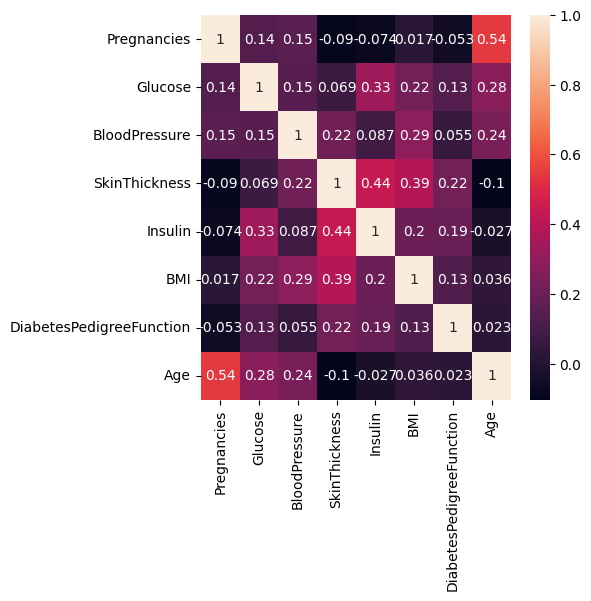

In [242]:
plt.figure(figsize=(5,5))
sns.heatmap(X_train_df.corr(),annot=True)

In [243]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
min_threshold=0.75
def correlation(df, min_threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > min_threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [244]:
corr_features = correlation(X_train_df, 0.7)
len(set(corr_features))

0

**Model Building**

**Random Forest**

Training the Model using Random Forest

In [245]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

Prediction from random forest model

Accuracy Score for Random Forest

In [246]:
# accuracy score on the training data

X_train_rfc_prediction = rfc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_rfc_prediction, Y_train)

In [247]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [248]:
# accuracy score on the test data
X_test_rfc_prediction = rfc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_rfc_prediction, Y_test)

In [249]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7467532467532467


Classification report and confusion matrix of the Random Forest classifier

In [250]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, X_test_rfc_prediction))
print(classification_report(Y_test,X_test_rfc_prediction))

[[87 13]
 [26 28]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       100
           1       0.68      0.52      0.59        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



**Decision Tree**

Training the Model using Decision Tree

In [251]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

Prediction from decision tree model

Accuracy Score for Decision Tree

In [252]:
# accuracy score on the training data

X_train_dtree_prediction = dtree.predict(X_train)
training_data_accuracy = accuracy_score(X_train_dtree_prediction, Y_train)

In [253]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [254]:
# accuracy score on the test data
X_test_dtree_prediction = dtree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_dtree_prediction, Y_test)

In [255]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7012987012987013


Classification report and confusion matrix of the Decision Tree classifier

In [256]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, X_test_dtree_prediction))
print(classification_report(Y_test,X_test_dtree_prediction))

[[83 17]
 [29 25]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       100
           1       0.60      0.46      0.52        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.65       154
weighted avg       0.69      0.70      0.69       154



**Support Vector Machine (SVM)**

Training the Model using Support Vector Machine (SVM)

In [257]:
classifier = svm.SVC(kernel='linear')

In [258]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Prediction from support vector machine model

Accuracy Score for SVM

In [259]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [260]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [261]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [262]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Classification report and confusion matrix of the SVM classifier

In [263]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, X_test_prediction))
print(classification_report(Y_test,X_test_prediction))

[[91  9]
 [26 28]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



**The Conclusion from Model Building**

Therefore Support Vector Machine is the best model for this prediction since it has an accuracy_score of 0.77.

**Making a Predictive System**

In [264]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
